# Python入門講座第5回 : 流れを意のままに

## きょうの目標 

今日の講座では、`while`文による繰り返しで、フィボナッチ関数を再定義してみます。

* * * *
- python3の制御構造：`while`文
  - `if`文,`while`文, `for`文: 制御文／制御構造
      - `break`/`continue`/`pass`/`...`(Ellipsis)
  - 論理式：　

- 代入式
  - 代入文との違い

- 実行時間の測定：`timeit`モジュール
* * * *

などについてご説明します。

## `fib（）`関数の別定義
これまで使ってきた漸化式を元にしたフィボナッチ数列の関数は次のような物でした。

In [1]:
def fibr(n:int)->int:
    """
    returns the n-th fibonacci number.
    """
    if n in (0,1):
        return 1
    return fibr(n-1) + fibr(n-2)

この再帰的に定義された`fibr(n)`は大きな`n`に対して、効率が悪く、実行速度も遅いという問題があります。
そこで、*再帰*を*繰り返し*に展開したフィボナッチ関数を次に示します。
Pythonの繰り返しには`for`文もありましたが、ここでは`while`文を使って書いてみました。

> Notes:
> 
> この実装は　[Python.org](https://www.python.org/) に掲載されている$n$を超えない最大のフィボナッチ数を求める関数を少し変形して、$n$番目のフィボナッチ数を求める関数に書き換えたものです。

新しいフィボナッチ数列の定義は次のようになりました。
この定義ではPython3の**代入式**と **`while`文** が使われています。これらの文法について次に解説します。

In [2]:
def fib(n:int)->int:
    """
    returns the n-th fibonacci number.
    """
    if n in (0, 1):
        return 1
    a=b=1 
    while (n := n-1 ) > 0:
        a, b = a+b, a # a: f_{k}, b:f_{k-1}
    return a

二つのフィボナッチ数列を求める関数(`fib`, `fibr`)の値を比較してみましょう。

In [3]:
print("\n".join([f"{n=:} {fib(n)=:} {fibr(n)=:}" for n in range(6)]))

n=0 fib(n)=1 fibr(n)=1
n=1 fib(n)=1 fibr(n)=1
n=2 fib(n)=2 fibr(n)=2
n=3 fib(n)=3 fibr(n)=3
n=4 fib(n)=5 fibr(n)=5
n=5 fib(n)=8 fibr(n)=8


このように二つの関数の値は一致します。

この関数では、一時変数　a,b　に　フィボナッチ数列のある時点での値と一つ前の値を保存します。
その時次のステップでの フィボナッチ数列の値は、`a+b`, 一つ前のフィボナッチ数列の値は　`a`です。

| i | 1 | 2 | 3 |4 |...|n-1| n |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| f_{i}　| 1| 2 | 3 | 5 |...| a| a+b|
| f_{i-1} | 1| 1 | 2 |3  |...|b| a|



例えば、`i=3`の時、`a`は3、`b`は2となっています。
``` python
a,　b = a+b, a
```
を実行すると、`a`は5、`b`は3となって、　`i=4`のフィボナッチ数列の値と、一つ前のフィボナッチ数列になります。
これを `n-1`回繰り返すと、`fib(n)`が求まるというわけです。

> Note:
>
> ここでもし、ループの中が次のようなプログラムだったとします。
>
>```python
>a=a+b
>b=a
>```
>
>`i=3`で`a`が3、`b`は2の時にこのプログラムを実行すると,
>プログラムの実行後は　`a`は5となりますが、`b`も5になってしまいます。
>
>ループの中身を
>``` python
>b=a
>a=a+b
>```
>とすると、今度は、実行後の値は`b`は3, `a`は　6 (= 3+3)になってしまいます。
>
>これを避けるためには、ループ中のプログラムを
>
>``` python
>t=a
>a=a+b
>b=t
>```
>
>とすることもできますが、pythonでは、
>
>``` python
>a,b = a+b,b
>```
>と簡単に書くことができます。

In [4]:
[fibr(n) for n in range(10)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

> Note:
> `for文`を使ったバージョンはこちら。

In [5]:
def fibl(n:int)->int:
    """
    returns the n-th fibonacci number.
    """
    if n in (0, 1):
        return 1
    a=b=1
    for i in range(1,n):
        a, b = b, a+b
    return b

[fibl(n) for n in range(6)]

[1, 1, 2, 3, 5, 8]

## Pythonの制御構造
まず、関数定義の中の、`while`文から見ていきましょう。

`while`文は、`if`文、`for`文と同じく、Pythonでのプログラムの流れを制御するための文です。

- `if`文は条件分岐を作ります。
- `while`文と`for`文は繰り返し(ループ）を作ります。

C言語などではこのほかにも,`repeat-until`構文、`do-while`構文、`switch-case`構文などをもつ言語もありますが、pythonの制御構造はこの三つ(`if`, `for`,`while`)だけです。


| 逐次実行 | if文　| for文 | while 文 |
|:--|:--|:--|:--|
|<文><br/><文...>| if <式>:<br/>&nbsp;&nbsp;<文...><br/>else:<br/>&nbsp;&nbsp;<文...> | for `var` in `iterable` :<br/>&nbsp;&nbsp;<文...> <br/>else: <br/>&nbsp;&nbsp;<文...>  |while <式>: <br/>&nbsp;&nbsp;<文...> <br/> else: <br/>&nbsp;&nbsp;<文...> | 
|![逐次実行]|![if文]|![for文]|![while文]|

[逐次実行]:_images/逐次実行文.png

[if文]: ./_images/if文.png

[while文]: ./_images/while文.png

[for文]: ./_images/for文.png

> Notes:
構造化定理（こうぞうかていり、英: Structure theorem）とは、任意の一入力・一出力関数は、順次（sequence）、選択（ifthenelse）、繰り返し（whiledo）の３つの基本制御構造からなる関数と等価であることを主張する定理である[1]。構造化プログラム定理（structured program theorem） あるいは ベーム-ヤコピーニの定理（Böhm-Jacopini theorem）とも呼ばれる.(wikipediaより）


### `if`文：

```python
if <式> :
    <プログラムブロック-1>
elif <式-2> :
    <プログラムブロック-2>
else:
    <プログラムブロック->
```
- `elif`節は必要なだけ繰り返してもよい。 (なくてもよい）
  - `elif` は`else-if`の省略
- `else`節はなくてもよいが、一つの`if`文には二つ以上あってはいけない。

<式>が論理値として真(`True`)になった時、対応する<プログラムブロックを実行する。
`if`あるいは`else`節に指定されたどの式も論理値としての値が偽(`False`)の場合、`else`節の<プログラムブロック>が実行される。

|if-elif-else文 |
|:-----|
| if <条件>:<br/>&nbsp;&nbsp;<文> ...<br/>elif <条件>:<br/>&nbsp;&nbsp;<文> <br/> ...<br/>else:<br/>&nbsp;&nbsp;<文>
|![if-elif-else文]|


[if-elif-else文]: ./_images/if-elif-else文.png

### `for`文：
- 第一形態： 
```python
for <識別子> in <> <繰り返し指定> :
    <プログラムブロック>
```
1. <繰り返し指定> の要素を<識別子>に設定して、<プログラムブロック>を実行します。
1. 要素がなくなれば, `for`文は終了します。
 
- 第二形態：
```python
for <識別子> in <> <繰り返し指定> :
    <プログラムブロック-1>
else:
    <プログラムブロック-2>
```
1.  <繰り返し指定> の要素を<識別子>に設定して、<プログラムブロック-1>を実行します。
1.  要素がなくなれば、<プログラムブロック-2>を実行して、`for`文を終了します。


### while文
- 第一形態：
```python
while <式> :
    <プログラムブロック>
```
1. `<式>`の値が真であれば、`<プログラム　ブロック>` を実行して、ループを繰り返します。

- 第ニ形態：
```python
while <式> :
    <プログラムブロック1>
else:
    <プログラムブロック2>
```
1. `<式>`の論理値としての値が真であれば、`<プログラム　ブロック1>` を実行して、ループを**繰り返す**。
1. `<式>`の論理値としての値が偽であれば、`<プログラム　ブロック2>` を実行して、ループを**終了**する。

### `break`文/`continue`文/`pass`文/`...` (Ellipsis)

`while`や`for`で作られたループを処理の途中で中断し、次の要素に進んだり、ループを抜け出すこともできます。
`continue`および`break`はこれらの目的に用意されています。


![Books](./_images/Books_on_the_shelf.png)

> Note:
書棚の本から目的とする本を内容を確認しながら、探すことを考えてみましょう。
書棚から順> 番に、
> 
> 1. **始：** 書籍を手に取ります。
> 1. タイトルをみて、目的の書籍でないことが明らかなら、次の本をチェックします。(`continue`)
> 1. 内容をチェックして、目的の本であることがわかれば、ここで探索を終了します。(`break`)
>    - 書棚にチェックしていない本がまだあっても、作業を終了します。
> 1. 次の書籍がまだあれば、 **始:** に戻ります。
> 1. 書棚の書籍がもうなければ(`else`節）、この書棚には目的の本はないということです.
> さあどうしましょう？

### `break`文/`continue`文/`pass`文/`...` (Ellipsis)

`while`や`for`で作られたループを処理の途中で中断し、次の要素に進んだり、ループを抜け出すこともできます。
`continue`および`break`はこれらの目的に用意されています。

#### `break`/`continue`
`while`文、`for`文の(`else`節を除く）　<プログラム　ブロック>は`break`文あるいは`continue`文　を含むことがあります。

- `break`文は`break`, `continue`文は`continue`だけ含む文です。
- `continue`文が実行されると、プログラムブロックの実行はそこで終了し、次の**繰り返し**に制御が移ります。
- `break`文が実行されると、プログラムブロックの実行はそこで終了し、`while`文あるいは`for`文の**次の文**に制御が移ります。


| for文 + coninue/break | | while 文 + coninue/break |
|:-------:| :--: | :-------:|
| ![for-beak文] |`    ` | ![while-break文] |
|  |  |

[for-beak文]: ./_images/for-continue-break文.png

[while-break文]: ./_images/While-continue-break文.png


#### `pass`文/`...` (Ellipsis)

プログラム開発中には、詳細は後々に埋めることとして、全体の枠組みだけを作っていくことがあります。`pass`文や`...`(Ellipsis)はそのような場合の埋め草として使われます。たとえば、

``` python
while condition :
    do_something()
else:
    pass

def do_something(arg):
    ...
```

といった具合です。`pass`文も`...` も **何もしない(No-op)** を表現しています。

## 代入文と代入式
次に、代入式　`(n := n-1 )`　を　見ていきましょう。

### 式文
以下の形式のプログラム中の行は 式文　と呼ばれます。
```
    <式＞　
    <式＞　, <式>, ...
```
式文では、`式`を評価します。　対話モードのPythonでは式の評価後の値(あるいは式のタプル）を印刷します。

### 代入文(assignment statement)

``` python
    a = b = 1

    a = 1
    b = 1
    
    a, b = 1, 1
```
などの文は**代入文**です。

**代入文**は変数に式を評価した値を割り当てます。
（Pythonでは代入文より割り当て文と呼んだほうがいいかもしれない。個人的見解です)
``` python
    <識別子> = <式> 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　
    <識別子> = <識別子> =... = <式> 
    <識別子> , <識別子>, ... 　= <式>, <式>,... #式の左右で要素の数が一致していること
    <識別子> , <識別子>, ... 　= <シークエンス>   #識別子の数とシークエンスの要素数は一致していること
    <識別子0> , <識別子1>,...,*<識別子n> = <シークエンス>　　#シークエンスの要素数　は`n`以上
```

Pythonの代入文はC言語のそれと異なり、値を持ちません。

###　代入式 assignment expression　`(n := n-1)`
walrus(セイウチ）  expression とも呼ばれます。　
`while`文、`if`文などの条件節で、代入式(`<識別子> := <式>`)を使うことができます。

代入式では`<識別子>`への`<式>`の代入を行い、その式の値が代入式の値となります。

|walrus(セイウチ）|
|:---:|
|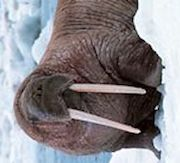|
([image source:](https://commons.wikimedia.org/wiki/File:Noaa-walrus22.jpg) )

In [6]:
# 例
if (v:=fib(10)) > 0:
    print(v)

89


> Note:
代入式 , walrus(セイウチ）  expression はpython 3.8で導入されました。
> 
> C-言語では代入文はなく、元々代入式であったので、なにを今更という感じかもしれません。
> 
> ``` python
> if v:=fib(10) > 0:
>     print(v)
> ```
はエラーにはなりませんが
> ``` python
> if v:=(fib(10) > 0):
>     print(v)
> ```
と解釈されてしまうので、注意が必要です。

## 比較演算子
`if`文、`while`文には 分岐／継続のための条件式が必要です。
条件式は比較演算子や論理演算子を組み合わせてつくることができます。
値の比較はC言語とほぼ同じです。 比較の結果はブール値(`True` または　 `False`)です。

```
    <式> == <式>　　　　　　　　# 　右辺と左辺は同じ値
    <式> != <式>　　　　　　　　# 　右辺と左辺は異なる値
    <式> > <式>
    <式> >= <式>
    <式> < <式>
    <式> <= <式>
    <式> in <式>　　　　　　　　　　　# 左辺が右辺の要素にふくまれる。　 （例：　n in (0,1))
    <式> not in <式>　　　# 左辺は右辺の要素に含まれない。 (例：　n not in (0,1))
    <式> is <式> 　　　　　　　　　# 右辺と左辺は同じオブジェクト
    <式> is not <式>　　　# 右辺と左辺は異なるオブジェクト
```

### オブジェクトの等価性(`=　=`)と同一性(`is`)

`==`（二つの等号)は両辺の式の**値**が等しいときに`True`となります。
`is` は両辺の式が同じ**オブジェクト**であるとき、`True`となります。

In [7]:
a=(1,2,3)
b=(1,2,3)

print(a == b, a is b, id(a) == id(b))

True False False


`id()`は引数に与えられたオブジェクトの　アイデンティティ(多くの場合は、オブジェクトのアドレス）を返します。

`a`, `b` はいずれも`1,2,3`を要素とするタプルですが、別のオブジェクトです。

In [8]:
a=b=(1,2,3)
print(a == b, a is b, id(a) == id(b))

True True True


`a`, `b` は同じオブジェクトです。もちろんその値も一致します。

In [9]:
a=[1,2,3]
b=(1,2,3)

print(a == b, a is b, id(a) == id(b))

False False False


リストとタプルは違う種類のオブジェクトなので、値としても異なります。

>  ここで質問です。
> ``` python
> a=100
> b=100
> ```
> とした時、
> 
> ```
> print( a == b, a is b, id(a) == id(b))
> ```
> 
> はどんな結果になるでしょう？　結果を予想してから実行してみましょう。
> 解説は次回に。

In [10]:
a=100.0
b=100.0
print( a == b, a is b, id(a) == id(b))

True False False


Python では -5~256の整数は特別扱いされている。これらの整数はシステム初期化時に作成されたオブジェクトが使い回される。


### 比較の連鎖

pythonでは　`expr1 < expr2 < expr3`のような書き方が許されています。この式は、`expr1 < expr2`かつ` expr2 < expr3`の時に限って`True`となります。
この式は、`(expr1 < expr2) and (expr2　<　expr3)`とは異なり、
`expr2`は***一度だけ評価*** されます。

In [11]:
x=1/2
0 < x < 1

True

## 論理演算(ブール演算）と　整数のビット毎の演算

- 論理演算: `and`,　`or`, `not`
- ビット毎の論理演算：　`&`,　`|`, `^`(exclusive or), `~` (invert)
    -  ビットシフト演算子: `>>` , `<<`

論理演算はC言語の場合　( `&&`, `||` , `!` ) とは異なります。　

### 論理式の値

一般の式に対して、論理演算を行った結果は、ブール値(True/False)とは限りません。　

<式> `op` <式> 

結果の真偽を決めた式と同じタイプの型を持ちます。　　次の例をご覧ください：

In [12]:
print(
    f"{2.0 and 3.0 = :}, {2.0 or 3.0 = :},\n"
    f"{2.0 and 0.0 = :}, {not 2.0 = :}, {not 0.0 = :}\n",
    f"{(1.0 == 0.0) and 1.0 = :}, {(1.0 == 0.0) or 1.0 = :}"
)

2.0 and 3.0 = 3.0, 2.0 or 3.0 = 2.0,
2.0 and 0.0 = 0.0, not 2.0 = False, not 0.0 = True
 (1.0 == 0.0) and 1.0 = False, (1.0 == 0.0) or 1.0 = 1.0


> 再び、 ここで質問です。
> 
> `((r:=1) or (r:=r+2)) and (r:=r+4)`
> 
> および
> 
> `((r:=1) and (r:=r+2)) or (r:=r+4)`
> 
> の結果はそれぞれ何になりますか？

In [13]:
((r:=1) or (r:=r+2)) and (r:=r+4)

5

In [14]:
((r:=1) and (r:=r+2)) or (r:=r+4)

3

#### 整数のビット演算
整数に対しては、　ビット毎の論理演算子：　&,　|, ^(exclusive or) , ~ (not)が使えます。
整数同士の論理演算の結果は、先ほど見たように、整数となります。

In [15]:
print(
    f"{0x0f and 0xab = :02x}, {0x0f or 0xab = :02x},\n"
    f"{0x0f and 0x00 = :02x}, {0x0f or 0x00 = :02x},\n"
    f"{not 0xab = :02x}, {not 0x00 = :02x}"
)

0x0f and 0xab = ab, 0x0f or 0xab = 0f,
0x0f and 0x00 = 00, 0x0f or 0x00 = 0f,
not 0xab = 00, not 0x00 = 01


同じデータにビットごと論理演算子を使った場合、結果は全く異なります。

In [16]:
print(
    f"{0x0f & 0xab = :02x}, {0x0f | 0xab = :02x}, {0x0f ^ 0xab = :02x}\n"
    f"{0x0f & 0x00 = :02x}, {0x0f | 0x00 = :02x}, {0x0f ^ 0x00 = :02x}\n"
    f"{~ 0xab = :02x}, {~ 0x00 = :02x}\n"
    f"{0xff & (~ 0xab )= :02x}, {0xff&(~ 0x00) = :02x}\n" 
    f"{0xff ^    0xab  = :02x}, {0xff ^ 0x00  = :02x}"
)

0x0f & 0xab = 0b, 0x0f | 0xab = af, 0x0f ^ 0xab = a4
0x0f & 0x00 = 00, 0x0f | 0x00 = 0f, 0x0f ^ 0x00 = 0f
~ 0xab = -ac, ~ 0x00 = -1
0xff & (~ 0xab )= 54, 0xff&(~ 0x00) = ff
0xff ^    0xab  = 54, 0xff ^ 0x00  = ff


Note:
 `(~n) + n`をビット表現で考えると、　`0xffffffff=-1`になる。つまり `(~n) == -n -1 `である。
 
 制御などでビット反転が必要な時は、`0xffffffff`などとのexclusive or(`^`)をとる方がいいでしょう。

In [17]:
f"{0xf0 & 0xff =:02x}, {0xf0 | 0x0f =:02x}, {0xf0 ^ 0xff =:02x}"

'0xf0 & 0xff =f0, 0xf0 | 0x0f =ff, 0xf0 ^ 0xff =0f'

# 高速化の手法と実行速度の測定

前回定義したフィボナッチ関数と今回のフィボナッチ関数の実行速度を比べてみましょう。

まずは前回使った定義を再度示します。再帰的に定義されていることから、`fibr()`と名前を変えてあります。

In [18]:
def fibr(n:int)->int:
    """
    returns the n-th fibonacci number.
    """
    if n in (0,1):
        return 1
    return fibr(n-1) + fibr(n-2)

二つの関数の結果は一致しています。

In [19]:
[fib(i) for i in range(10)], [fibr(i) for i in range(10)],[fibl(i) for i in range(10)]

([1, 1, 2, 3, 5, 8, 13, 21, 34, 55],
 [1, 1, 2, 3, 5, 8, 13, 21, 34, 55],
 [1, 1, 2, 3, 5, 8, 13, 21, 34, 55])

### 実行時間の測定
ここでは簡単のために、jupyterのセルマジック　`%%timeit`を使って、プログラムの実行速度を測ってみます。

In [20]:
%%timeit 
n=10
fibr(n)

19.2 µs ± 375 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%%timeit 
n=10
fib(n)

722 ns ± 4.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


セルマジック`%%timeit`に変わって、ラインマジック`%timeit`も使えます。
また、`timeit` モジュールを使って、直接に実行速度を計算することもできます。

In [22]:
n=10
%timeit fibr(n)
%timeit fib(n)
Nrep=1000000
import timeit
print(timeit.timeit("fib(n)",
                    setup="n=10", 
                    globals=locals(),
                    number=Nrep)/Nrep)

20.1 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
721 ns ± 7.86 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
7.165563750000033e-07


In [23]:
%%timeit 
n=10
fibl(n)

579 ns ± 9.77 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


`timeit`モジュールを使って、より詳細にしらべることもできます。

In [24]:
import timeit

(n:=0, \
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibl(n)", globals=locals(), number=1),\
 timeit.timeit("fibr(n)", globals=locals(), number=1)),\
(n:=10, \
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibl(n)", globals=locals(), number=1),\
 timeit.timeit("fibr(n)", globals=locals(), number=1)),\
(n:=20, \
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibl(n)", globals=locals(), number=1),\
 timeit.timeit("fibr(n)", globals=locals(), number=1)),\
(n:=30, \
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibl(n)", globals=locals(), number=1),\
 timeit.timeit("fibr(n)", globals=locals(), number=1))

((0, 1.00000000458067e-06, 7.500000052118594e-07, 6.249999984220267e-07),
 (10, 1.4160000034735276e-06, 1.7910000025267436e-06, 1.9791999996243703e-05),
 (20, 1.9169999987411757e-06, 1.666999999372365e-06, 0.0022767500000000496),
 (30, 2.750000000162345e-06, 3.4580000018991086e-06, 0.29529200000000344))

In [25]:
 for n in range(0,40,10):
        print(
            n, 
            timeit.timeit("fib(n)", globals=globals(), number=1),
            timeit.timeit("fibl(n)", globals=globals(), number=1),
            timeit.timeit("fibr(n)", globals=globals(), number=1)
        )

0 1.0839999973200065e-06 7.49999998106432e-07 4.999999987376214e-07
10 1.7079999992120065e-06 1.957999998580817e-06 2.0290999998451298e-05
20 2.8340000000071086e-06 2.416999997478797e-06 0.002249958000000163
30 3.375000005689799e-06 2.9170000033218457e-06 0.28893924999999854


## きょうのまとめ

今日の講座では、以下の項目についてご説明しました。

* * * *
- python3の制御構造：`while`文
  - `if`文,`while`文, `for`文: 制御文／制御構造
      - `break`/`continue`/`pass`/`...`(Ellipsis)
  - 論理式：　

- 代入式
  - 代入文との違い

- 実行時間の測定：`timeit`モジュール
* * * *

# 付録

## JIT(Just in time compiler)を使ってみる。
pythonプログラムの工夫で実行速度を短縮することができました。さらに実行速度を短縮してくれるツールもあります。

numbaはpythonプログラムをJITでコンパイルし、実行時間を大幅に短縮してくれるモジュールです。
Pythonとは別のツール、llvmコンパイラなど、のインストールが必要です。
Pythonの高速化にはこの他にもcythonなどのツールが存在しています。

ここでは、フィボナッチ関数を高速化してみます。　numbaのjitモジュールを使います。
`@jit`はpythonのデコレーターという機能で、定義された関数に前処理を付け加えることができます。ここでは前処理として、pythonの関数をnumba.jitでコンパイルして、
機械語バージョンの関数を使って関数を評価します。

In [26]:
import numba 
from numba import jit
import random

@jit(nopython=True)
def fibn(n:int)->int:
    if n in (0, 1):
        return numba.longlong(1)
    a=b=numba.longlong(1)
    while (n := n-1 ) > 0:
        a, b = b, a+b
        if (b < 0):
            raise ValueError("Negative result")
    return b
fibn(0)

1

最後の行で、`fibn()`は機械語にコンパイルされ、以降は`fibn()`の評価にこの機械語プログラムが使われます。

In [27]:
print(
    [fib(i) for i in range(10)],"\n",
    [fibn(i) for i in range(10)],
)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55] 
 [1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


結果は同じになっているようなので、実行速度を測ってみます。

`%%timeit`はjupyterのセルマジックの一つで、timeitモジュールをつかって、セルの実行時間を測定します。

In [28]:
%%timeit
n=40
fib(n)

2.98 µs ± 53.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
%%timeit
n=40
fibn(n)

171 ns ± 0.882 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


と大幅に改善されています。

しかし、別の極端な場合(n=0)をみると、jit版の方が時間がかかっています。
機械語のプログラムの呼び出し、戻り値のPythonへの変換などのオーバーヘッドがあるためと考えられます。

In [30]:
%%timeit
n=0
fib(n)

85.1 ns ± 1.38 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [31]:
%%timeit
n=0
fibn(n)

137 ns ± 1.39 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


これら二つの関数は, n=91までは同じ値を返します。

In [32]:
[(i,fib(i)) for i in range(90,92,1)], [(i,fibn(i)) for i in range(90,92,1)]

([(90, 4660046610375530309), (91, 7540113804746346429)],
 [(90, 4660046610375530309), (91, 7540113804746346429)])

しかし、`n=92`の場合を計算してみると、

In [33]:
try:
    print(f"{fib(92)=:}")
    print(f"{fibn(92)=:}")
except ValueError as m:
    print("Error!",m)

fib(92)=12200160415121876738
Error! Negative result


と`fibn`はエラーになってしまいます。これは、python3の整数に上限はありませんが、numbaでコンパイルされた関数の`fibn`中では、オーバーフローにより、正であるべき変数が負になったためです。

In [34]:
0x7fffffffffffffff > (4660046610375530309 + 7540113804746346429)

False

jitでコンパイルされる関数でuint64=ulonglongとして、エラーを回避できるか試してみましょう。

In [35]:
@jit(nopython=True)
def fibln(n:int)->int:
    if n in (0, 1):
        return numba.uint64(1)
    a=b=numba.uint64(1)
    for i in range(1,n):
        a, b = b, a+b
        if (b < 0):
            raise ValueError
    return b
fibln(0)

1

In [36]:
fibln(92),fib(92)

(12200160415121876738, 12200160415121876738)

とn=92に対しては、正しいあたいがもとまりました。ところが、n=93については、

In [37]:
fibln(93),fib(93)

(1293530146158671551, 19740274219868223167)

と異なった値が出てきます。これは結果を16進表示してわかるように、結果がuint64で表現できる最大の値をこえているためです。

In [38]:
f"{fib(93) =:018x}",f"{fibln(93) =:018x}",

('fib(93) =0111f38ad0840bf6bf', 'fibln(93) =0011f38ad0840bf6bf')

いくら高速でもこれでは困ります。 整数を諦めて、　結果を浮動小数点で求めることもできます。

In [39]:
@jit(nopython=True)
def fibfn(n:int)->int:
    if n in (0, 1):
        return numba.uint64(1)
    a=b=numba.float64(1)
    for i in range(1,n):
        a, b = b, a+b
        if (b < 0):
            raise ValueError
    return b
fibfn(0)

1.0

In [40]:
[(i,fibfn(i)) for i in range(90,94,1)], [(i,fib(i)) for i in range(90,94,1)]

([(90, 4.66004661037553e+18),
  (91, 7.540113804746346e+18),
  (92, 1.2200160415121877e+19),
  (93, 1.9740274219868226e+19)],
 [(90, 4660046610375530309),
  (91, 7540113804746346429),
  (92, 12200160415121876738),
  (93, 19740274219868223167)])

これでとりあえずは結果が真の値から大きくずれてしまうことはありません。(float64の精度範囲で一致）
しかし、　n>1475ではfloat64の表現できる数値を超えてしまいます。

In [41]:
fib(1475),fibfn(1475), fib(1476), fibfn(1476)

(130698922376339931803631155380271983098392443907412640726006659460192793070479231740288681087777017721095463154979012276234322246936939647185366706368489362660844147449941348462800922755818969634743348982916424954062744135969865615407276492410653721774590669544801490837649161732095972658064630033793347171632,
 1.3069892237633987e+308,
 211475298697902185255785861961179135570552502746803252174956226558634024323947666637137823932524397611864671566211908330263377425204552074188208686993669123754004340250943108709212299180422293009765404930508242975773774612140021599477983006713536106549441161323499077298115887067363710153036315849480388057657,
 inf)

In [42]:
import timeit
(n:=0, \
 timeit.timeit("fib(n)", globals=globals(), number=1),\
 timeit.timeit("fibn(n)", globals=globals(), number=1)),\
(n:=3,\
 timeit.timeit("fib(n)", globals=globals(), number=1),\
 timeit.timeit("fibn(n)", globals=globals(), number=1)),\
(n:=30,\
 timeit.timeit("fib(n)", globals=globals(), number=1),\
 timeit.timeit("fibn(n)", globals=globals(), number=1)),\
(n:=91,\
 timeit.timeit("fib(n)", globals=globals(), number=1),\
 timeit.timeit("fibn(n)", globals=globals(), number=1))

((0, 9.160000047359063e-07, 5.332999990059761e-06),
 (3, 1.167000007740171e-06, 7.49999998106432e-07),
 (30, 2.708000010898104e-06, 7.090000053722179e-07),
 (91, 7.457999998905507e-06, 6.249999984220267e-07))

In [43]:
@jit(nopython=False)
def fibrn(n:int)->int:
    if n == 0 or n == 1:
        return numba.int64(1)
    return fibrn(n-1) + fibrn(n-2)
fibrn(0),fibr(0)

(1, 1)

In [44]:
(n:=0, 
 timeit.timeit("fibr(n)", globals=locals(), number=1),\
 timeit.timeit("fibrn(n)", globals=locals(), number=1),\
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibn(n)", globals=locals(), number=1),\
 timeit.timeit("fibl(n)", globals=locals(), number=1),\
 timeit.timeit("fibln(n)", globals=locals(), number=1))

(0,
 1.1669999935293163e-06,
 5.166999997641142e-06,
 7.919999944761003e-07,
 1.7499999955816747e-06,
 8.749999977908374e-07,
 1.834000002531866e-06)

In [45]:
(n:=34, 
 timeit.timeit("fibr(n)", globals=locals(), number=1),\
 timeit.timeit("fibrn(n)", globals=locals(), number=1),\
 timeit.timeit("fib(n)", globals=locals(), number=1),\
 timeit.timeit("fibn(n)", globals=locals(), number=1))

(34,
 1.9238507079999891,
 0.04720058399999516,
 5.458000003955021e-06,
 2.250000008530151e-06)

In [46]:
timeit.Timer("(fibrn(20))", globals=locals()).autorange(lambda number, time_taken:print(number, time_taken))

1 6.279199999426055e-05
2 0.00012150000000588079
5 0.00029895900000553866
10 0.0005972499999984393
20 0.0011201249999999163
50 0.0027729580000084297
100 0.005542207999994275
200 0.012367707999999311
500 0.028814584000002696
1000 0.056347207999991156
2000 0.11250199999999211
5000 0.2801979590000059


(5000, 0.2801979590000059)

In [47]:
timeit.timeit("(fibrn(0))", globals=locals(), number=1),\
timeit.timeit("(fibrn(10))", globals=locals(), number=1),\
timeit.timeit("(fibrn(20))", globals=locals(), number=1),\
timeit.timeit("(fibrn(30))", globals=locals(), number=1),\
timeit.timeit("(fibrn(35))", globals=locals(), number=1),\
timeit.timeit("(fibrn(40))", globals=locals(), number=1),\
timeit.timeit("(fibrn(43))", globals=locals(), number=1)

(5.666999996378763e-06,
 1.3749999965284587e-06,
 5.59160000079828e-05,
 0.007095250000006104,
 0.07875716700000623,
 1.0202988329999982,
 7.170110916999988)

In [48]:
timeit.timeit("(fibr(0))", globals=locals(), number=1),\
timeit.timeit("(fibr(10))", globals=locals(), number=1),\
timeit.timeit("(fibr(20))", globals=locals(), number=1),\
timeit.timeit("(fibr(30))", globals=locals(), number=1),\
timeit.timeit("(fibr(35))", globals=locals(), number=1)

(1.3340000037942445e-06,
 1.9999999992137418e-05,
 0.0022419999999954143,
 0.2828014999999908,
 3.0749212500000027)

In [49]:
%time fib(35)
%timeit fib(35)
%timeit fib(10)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 7.87 µs
2.55 µs ± 32.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
690 ns ± 5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [50]:
%timeit fib(20)

1.47 µs ± 8.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [51]:
@jit(nopython=False)
def foo(n:int)->int:
    return numba.int64(n)
v=foo(0)

In [52]:
timeit.timeit("(foo(20))", globals=globals(), number=1)

4.708000005848589e-06

# 関数実行プロファイルをチェックする
プログラムの動作を理解する上で、関数実行プロファイルも役に立つ情報の一つです。

In [53]:
import cProfile

In [54]:
cProfile.run("fibr(30)")

         2692540 function calls (4 primitive calls) in 0.505 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
2692537/1    0.505    0.000    0.505    0.505 968652943.py:1(fibr)
        1    0.000    0.000    0.505    0.505 <string>:1(<module>)
        1    0.000    0.000    0.505    0.505 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [55]:
@jit(nopython=True)
def Nfib(n:int)->int:
    if n in (0, 1):
        return numba.ulonglong(1)
    a=b=numba.ulonglong(1)
    while (n := n-1 ) > 0:
        a, b = b, a+b+1
        if (b < 0):
            raise ValueError
    return b
import math
Nfib(30)

2692537.0

In [56]:
cProfile.run("fibn(91)")

         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2970711770.py:5(fibn)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [57]:
cProfile.run("fibrn(40)")

         4 function calls in 0.843 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.843    0.843    0.843    0.843 2759940478.py:1(fibrn)
        1    0.000    0.000    0.843    0.843 <string>:1(<module>)
        1    0.000    0.000    0.843    0.843 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


